# Исследование объявлений о продаже квартир

**Цель проекта**: научиться определять рыночную стоимость объектов недвижимости, используя установленные параметры, что поможет в подготовке автоматизированной системы, которая сможет отслеживать аномалии и мошенническую деятельность.

**Задача проекта**: установить параметры для определения рыночной стоимости объектов недвижимости.

**Данные для анализа**: архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В архиве по каждой квартире на продажу доступны два вида данных: 1) те, что вписаны пользователем, 2) полученные автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма).

**Описание данных архива**:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — номер этажa
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

*Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.*

## Изучение данных из файлов

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [149]:
data = pd.read_csv('D:/учеба/портфолио/roots/flat.csv', sep='\t')

In [150]:
#первоначально оценим данные, посмотрим первые и последние 10 строк, а также случайную выборку
display(data.head(10))
display(data.tail(10))
display(data.sample(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21969,3,13500000.0,95.1,2017-11-10T00:00:00,3,NaN,12.0,56.2,7,NaN,...,18.8,5.0,Санкт-Петербург,18065.0,4232.0,0.0,NaN,1.0,295.0,90.0
16356,18,4870000.0,46.1,2019-04-16T00:00:00,2,2.50,5.0,30.0,1,NaN,...,5.5,NaN,Санкт-Петербург,17860.0,11165.0,0.0,NaN,0.0,NaN,NaN
2447,10,12480000.0,87.0,2017-05-28T00:00:00,3,3.00,7.0,65.0,5,False,...,9.5,1.0,Санкт-Петербург,11171.0,8690.0,1.0,525.0,3.0,781.0,366.0
7682,11,2400000.0,43.0,2017-08-26T00:00:00,2,NaN,5.0,28.0,2,NaN,...,5.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,117.0
19047,10,3100000.0,65.0,2018-09-22T00:00:00,3,2.50,5.0,47.0,1,NaN,...,6.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,53.0
5624,9,12000000.0,110.2,2018-01-18T00:00:00,3,3.52,6.0,57.3,3,NaN,...,18.3,NaN,Санкт-Петербург,24110.0,3677.0,2.0,513.0,3.0,477.0,85.0
1365,13,5950000.0,72.5,2017-09-25T00:00:00,3,2.50,9.0,45.0,6,NaN,...,8.6,NaN,Санкт-Петербург,20832.0,5768.0,0.0,NaN,3.0,163.0,120.0
19426,20,4100000.0,35.9,2018-03-29T00:00:00,1,2.60,25.0,NaN,25,NaN,...,NaN,NaN,Санкт-Петербург,15510.0,16242.0,1.0,492.0,0.0,NaN,45.0
9836,13,9500000.0,84.0,2017-12-19T00:00:00,3,NaN,23.0,52.0,12,NaN,...,12.5,NaN,Санкт-Петербург,32279.0,12790.0,0.0,NaN,0.0,NaN,35.0
18096,2,6177600.0,70.2,2015-11-10T00:00:00,3,NaN,4.0,43.7,4,False,...,9.4,0.0,Зеленогорск,72469.0,53568.0,2.0,574.0,1.0,507.0,259.0


По выборкам видно, что данные объемны. В них очень много пропусков. Порядок следования столбцов друг за другом неудобен. Большинство столбцов содержат количественные данные, но есть и категориальные. Несмотря на большое количество столбцов, не все они равнозначны для нашего исследования.

In [151]:
#Далее оценим количество данных и их наполнение информацией.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, у нас 22 столбца, 23699 строк в тех столбцах, что без пропусков. Типы данных: bool(2), float64(14), int64(3), object(3). Здесь есть несовпадение с исходным описанием данных, столбец "is_apartment  - тип данных object" - хотя в документации был заявлен как булевы данные. Действительно много пропусков, но те данные(столбцы), что нужны для определения рыночной стоимости содержат меньшее количество пропусков. Большая доля пропусков приходится на важные, но второстепенные для нашего исследования данные (расстояния до парков, водоемов, аэропорта). В названиях столбцов не приведены единицы измерения (площади, расстояния, цены).

In [152]:
data.describe()
#посмотрим описание числовых данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Для работы с ценой далее будет удобнее поменять тип значений. В данных есть аномальные значения: например, предлагаемые для продажи 60-этажные дома, квартиры с высотой потолков 1 метр, квартиры с общей площадью 900 кв.м.

### Вывод

**Данных много и в них много пропусков. Есть аномальные данные. Основные данные необходимые для анализа содержат пропуски, но их количество не критично для продолжения работы над проектом.**.

## Предобработка данных

Далее обработаем название столбцов и их порядок, дубликаты, посмотрим типы данных и внимательно обработаем пропуски.

In [153]:
#посмотрим названия колонок
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Поменяем некоторые названия: добавив единицы измерения (в цену - рубли), убрав прыгающий регистр, заменив 3000 на 3km

In [154]:
data=data.rename(columns={'last_price':'last_price_rub',
                         'total_area':'total_area_m', 'ceiling_height':'ceiling_height_m',
                         'living_area':'living_area_m', 'kitchen_area':'kitchen_area_m',
                         'airports_nearest':'airports_nearest_m', 'cityCenters_nearest':'city_centers_nearest_m',
                         'parks_nearest':'parks_nearest_m', 'ponds_nearest':'ponds_nearest_m',
                         'parks_around3000':'parks_around_3km', 'ponds_around3000':'ponds_around_3km'}
                )
data.columns#проверим переименование

Index(['total_images', 'last_price_rub', 'total_area_m',
       'first_day_exposition', 'rooms', 'ceiling_height_m', 'floors_total',
       'living_area_m', 'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area_m', 'balcony', 'locality_name', 'airports_nearest_m',
       'city_centers_nearest_m', 'parks_around_3km', 'parks_nearest_m',
       'ponds_around_3km', 'ponds_nearest_m', 'days_exposition'],
      dtype='object')

Поменяем порядок следования столбцов: где, что продается(площади, этажность, балконы и пр.),  далее - цена, когда, как долго продавалась квартира, расстояние до центра  и в конце - допинфа о парках, аэропортах, водоемах.

In [155]:
data = data[[
    'locality_name', 'rooms', 'total_area_m', 'living_area_m', 'kitchen_area_m', 'ceiling_height_m', 'balcony',
    'floor',  'floors_total','total_images', 'studio', 'open_plan', 'is_apartment',
    'last_price_rub', 'first_day_exposition', 'days_exposition',
    'city_centers_nearest_m','airports_nearest_m', 'parks_around_3km', 'parks_nearest_m', 'ponds_around_3km', 'ponds_nearest_m'
]]
data.head(1) #проверяем

,locality_name,rooms,total_area_m,living_area_m,kitchen_area_m,ceiling_height_m,balcony,floor,floors_total,total_images,...,is_apartment,last_price_rub,first_day_exposition,days_exposition,city_centers_nearest_m,airports_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m
0,Санкт-Петербург,3,108.0,51.0,25.0,2.7,NaN,8,16.0,20,...,NaN,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0


In [156]:
#поищем явные дубликаты
data.duplicated().sum()

0

Явных дубликатов нет. Далее в данных с названием населенных пунктов поищем неявные дубликаты

**Цена**

In [157]:
#приведем данные c научного вида к типу данных 'Int64'
data['last_price_rub'] = data['last_price_rub'].astype('int')

### Обработка пропусков

In [158]:
#представим пропуски в количественном виде
data.isna().sum()

locality_name                49
rooms                         0
total_area_m                  0
living_area_m              1903
kitchen_area_m             2278
ceiling_height_m           9195
balcony                   11519
floor                         0
floors_total                 86
total_images                  0
studio                        0
open_plan                     0
is_apartment              20924
last_price_rub                0
first_day_exposition          0
days_exposition            3181
city_centers_nearest_m     5519
airports_nearest_m         5542
parks_around_3km           5518
parks_nearest_m           15620
ponds_around_3km           5518
ponds_nearest_m           14589
dtype: int64

Больше всего пропущенных значений в данных is_apartment, parks_nearest_m/ponds_nearest_m и balcony. В важных для нас категориях: общая площадь, цена, количество комнат и этаж - пропусков нет.

Далее обработаем пропуски, где это возможно. Опишем их и попытаемся выяснить причины появления.

#### Данные булева типа

Посмотрим распределение данных о студиях

In [159]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Также оценим распределение данных об открытых планировках квартир

In [160]:
data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

Данные выглядят закономерно, пропусков нет. Студия и жилье свободной планировки - относительно новые типы недвижимости, поэтому вполне логично их незначительное присутствие в наших данных.

То же относится и к апартаментам, но здесь в данных пропусков очень много.

In [161]:
#посмотрим долю пропусков в данных
data['is_apartment'].isna().mean()

0.8829064517490189

In [162]:
#Также посмотрим в каком количестве предствалены присутствующие значения 'is_apartment'
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Здесь распределение имеющихся в наличии значений также закономерно: апартаментов меньше, обычных квартир - значительно больше.

Посмотрим в каких населенных пунктах продавцы определили свое жилье как апартаменты/не апартаменты 

In [163]:
data[data['is_apartment'] == True]['locality_name'].value_counts()

Санкт-Петербург    39
Выборг              3
Петергоф            1
Всеволожск          1
Никольское          1
Колпино             1
посёлок Щеглово     1
Красное Село        1
деревня Нижняя      1
Зеленогорск         1
Name: locality_name, dtype: int64

In [164]:
data[data['is_apartment'] == False]['locality_name'].value_counts().head(20)

Санкт-Петербург            1794
посёлок Шушары               58
посёлок Мурино               54
деревня Кудрово              48
Пушкин                       48
Гатчина                      44
Колпино                      43
Всеволожск                   43
посёлок Парголово            41
Выборг                       29
Петергоф                     23
Сестрорецк                   23
Никольское                   21
Ломоносов                    21
Кингисепп                    21
деревня Новое Девяткино      21
Красное Село                 20
поселок Мурино               19
Тосно                        19
Сосновый Бор                 17
Name: locality_name, dtype: int64

Полученные данные вполне правдоподобны, в данных вместе с СПБ крупные населенные пункты, где может строиться такой тип жилья, могут быть в продаже апартаменты и где важно эту информацию при продаже квартиры указать (не "классические" села и деревни).

Пропуски полностью случайные, то есть восстановить их из других данных нашего архива нельзя.
Почему такие пропуски образовались - вероятна техническая ошибка в процессе подготовки архива для анализа. Так как в документации тип данных булев, а по факту is_apartment - object. Либо продавцы просто не предоставляли такую информацию.

**Для нашего исследования все столбцы с булевыми значениями имеют второстепенное значение. Даже если далее нужно будет выделить такой тип жилья и анализировать только его (стоимость квадрата студии/апартаментов/открытой планировки, зависимость этой цены от других факторов и пр.) - данных для достоверных выводов нам не хватит. Количество студий в архиве всего 149, открытой планировки - 67 и апартаментов 50. Напомню общий объем данных - 23699 объектов недвижимости.
В исследовании не стоит задача выделить "обычное" жилье и проанализировать только его. Поэтому удалим не строки с пропусками, а столбцы.**

In [165]:
del data['studio']
del data['open_plan']
del data['is_apartment']
data.info() #проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   locality_name           23650 non-null  object 
 1   rooms                   23699 non-null  int64  
 2   total_area_m            23699 non-null  float64
 3   living_area_m           21796 non-null  float64
 4   kitchen_area_m          21421 non-null  float64
 5   ceiling_height_m        14504 non-null  float64
 6   balcony                 12180 non-null  float64
 7   floor                   23699 non-null  int64  
 8   floors_total            23613 non-null  float64
 9   total_images            23699 non-null  int64  
 10  last_price_rub          23699 non-null  int32  
 11  first_day_exposition    23699 non-null  object 
 12  days_exposition         20518 non-null  float64
 13  city_centers_nearest_m  18180 non-null  float64
 14  airports_nearest_m      18157 non-null

#### Названия населенных пунктов

**locality_name**

In [166]:
#посчитаем уникальные значения
len(data['locality_name'].unique())

365

In [167]:
#посмотрим эти названия, оценим вероятность наличия неявных дубликатов
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

При осмотре видно разный регистр в названиях, а также буква Ё - это может быть причиной неявных дубликатов. Проведем корректировку.

In [168]:
#приведем к одному регистру
data['locality_name'] = data['locality_name'].str.lower()
len(data['locality_name'].unique())

365

In [169]:
#из-за регистра дублей не было
#заменим е на ё, и снова посмотрим изменится ли количество уникальных значений
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
len(data['locality_name'].unique())
#убрали дубли из-за вариантов е/ё

331

In [170]:
#уберем неявные дубликаты
data['locality_name'] = data['locality_name'].replace('деревня кудрово', 'кудрово')
data['locality_name'] = data['locality_name'].replace('поселок мурино', 'мурино')


In [171]:
#посмотрим на отношение пропусков к общему количеству данных
data['locality_name'].isna().mean(), data['locality_name'].isna().sum()

(0.002067597788936242, 49)

In [172]:
#пропусков осталось немного, удалим их
data = data.dropna(subset=['locality_name']).reset_index()
data['locality_name'].isna().sum() #проверим количество пропусков 

0

**Обработали названия населенных пунктов (привели к одному регистру, убрали неявные дубликаты). После чего удалили строки с пропусками (доля пропущенных значений 0.0002, 49 строк).**

#### Пропуски в данных о площади

In [173]:
#еще раз посмотрим на описание данных, мы видим в максимумах очень большие значения
data[['total_area_m', 'living_area_m', 'kitchen_area_m']].describe()

,total_area_m,living_area_m,kitchen_area_m
count,23650.000000,21752.000000,21381.000000
mean,60.329069,34.448356,10.566403
std,35.661808,22.037664,5.901753
min,12.000000,2.000000,1.300000
25%,40.000000,18.600000,7.000000
50%,52.000000,30.000000,9.100000
75%,69.700000,42.300000,12.000000
max,900.000000,409.700000,112.000000


Пропусков в одном из главных блоков данных 'total_area_m' нет. Оценим достоверность данных, выведем на экран строки с максимальным значением общей площади.

In [174]:
data[data['total_area_m'] == data['total_area_m'].max()]

,index,locality_name,rooms,total_area_m,living_area_m,kitchen_area_m,ceiling_height_m,balcony,floor,floors_total,total_images,last_price_rub,first_day_exposition,days_exposition,city_centers_nearest_m,airports_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m
19505,19540,санкт-петербург,12,900.0,409.7,112.0,2.8,NaN,25,25.0,8,420000000,2017-12-06T00:00:00,106.0,7877.0,30706.0,0.0,NaN,2.0,318.0


В данных 'total_area_m' (общая площадь) есть очень большое максимальное значение. Такая строка всего одна, и ее информация по каждому из столбцов о площади 'living_area_m', 'kitchen_area_m' совпадает с их максимумом. В целом данные описывают скорее всего какой-то пентхаус (25 этаж 25этажного дома, высота потолков 2.8, цена). В данных есть информация о наличии фото этого объекта недвижимости. Примем, что информация достоверна, является редким предложением на рынке. Оставляем и работаем с этим и другими нетипичными данными об общей площади на следующих этапах проекта.

In [175]:
data[data['total_area_m'] == data['total_area_m'].min()]

,index,locality_name,rooms,total_area_m,living_area_m,kitchen_area_m,ceiling_height_m,balcony,floor,floors_total,total_images,last_price_rub,first_day_exposition,days_exposition,city_centers_nearest_m,airports_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m
19869,19904,санкт-петербург,1,12.0,10.0,NaN,2.55,NaN,2,5.0,4,2400000,2017-07-19T00:00:00,200.0,964.0,21314.0,1.0,886.0,2.0,45.0


Минимальное значение тоже единично, зная особенности петербургских перепланировок, ничего предпринимать не будем. Далее также обработаем эти данные как нетипичные.

In [176]:
#посмотрим на данные о пропусках
data[['living_area_m', 'kitchen_area_m']].isna().mean()

living_area_m     0.080254
kitchen_area_m    0.095941
dtype: float64

Пропусков 8-9%, удалять эти данные в таком количестве нельзя.

In [177]:
#узнаем среднее и медианное значение для замен пропусков
data[['living_area_m', 'kitchen_area_m']].agg({'mean', 'median'})

,living_area_m,kitchen_area_m
mean,34.448356,10.566403
median,30.000000,9.100000


Среднее и медианы заметно отличаются, для замены пропусков возьмем медианные значения, но сначала проведем проверку.

Создадим служебный столбец 'test'. В нем произведем вычитание из общей площади - площади жилой и площади кухни. В результате мы ожидаем получить положительные числа, числа равные нолю и пропуски NaN. Наличие отрицательных чисел - покажет недостоверные данные.

In [178]:
#произведем расчет и посмотрим значения меньше ноля
data['test'] = data['total_area_m'] - data['living_area_m'] - data['kitchen_area_m']
data[data['test'] < 0]

,index,locality_name,rooms,total_area_m,living_area_m,kitchen_area_m,ceiling_height_m,balcony,floor,floors_total,...,last_price_rub,first_day_exposition,days_exposition,city_centers_nearest_m,airports_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,test
184,184,санкт-петербург,1,30.20,26.10,6.20,2.65,NaN,5,9.0,...,2600000,2018-02-14T00:00:00,12.0,15031.0,13952.0,0.0,NaN,1.0,824.0,-2.100000e+00
545,545,санкт-петербург,1,23.80,20.00,5.00,NaN,NaN,9,18.0,...,4700000,2018-12-28T00:00:00,108.0,11849.0,9731.0,0.0,NaN,0.0,NaN,-1.200000e+00
551,551,мурино,1,31.59,30.55,9.28,2.70,2.0,2,19.0,...,3100000,2018-03-08T00:00:00,70.0,NaN,NaN,NaN,NaN,NaN,NaN,-8.240000e+00
601,601,санкт-петербург,2,53.70,48.30,7.00,2.50,2.0,5,12.0,...,5600000,2017-04-18T00:00:00,167.0,13252.0,50477.0,2.0,220.0,1.0,1250.0,-1.600000e+00
696,696,санкт-петербург,1,34.69,23.43,23.43,2.64,2.0,25,25.0,...,3364930,2014-11-27T00:00:00,574.0,12153.0,43396.0,0.0,NaN,0.0,NaN,-1.217000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,21868,сосновый бор,1,34.30,30.60,8.00,2.50,2.0,6,9.0,...,2600000,2018-09-26T00:00:00,107.0,NaN,NaN,NaN,NaN,NaN,NaN,-4.300000e+00
21870,21915,санкт-петербург,2,91.40,62.00,32.40,NaN,0.0,12,16.0,...,11990000,2016-05-16T00:00:00,93.0,12551.0,10934.0,0.0,NaN,0.0,NaN,-3.000000e+00
21911,21956,санкт-петербург,2,46.00,44.00,8.00,NaN,1.0,5,5.0,...,5200000,2018-07-20T00:00:00,7.0,15182.0,14103.0,1.0,488.0,0.0,NaN,-6.000000e+00
22354,22399,сланцы,3,54.80,39.50,15.30,2.50,NaN,3,5.0,...,850000,2019-01-26T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.552714e-15


In [179]:
#посмотрим долю ошибочных данных ко всему массиву данных
print(data[data['test'] < 0]['total_area_m'].count())
print(data[data['test'] < 0]['total_area_m'].count() / len(data))

67
0.002832980972515856


Данные с отрицательными числами есть, их доля невелика, поэтому удалим их.

In [180]:
#заполним пропуски нолями
data['test'] = data['test'].fillna(0)

In [181]:
#оставим в данных те, что больше ноля или равны нолю
data = data.loc[data['test'] >= 0]

Недостоверные данные убрали, теперь работаем с пропусками. Так как данные о площади взаимосвязаны, заполняя их сразу медианами мы рискуем превратить ряд данных в некорректные.

Для начала проверим симметричность пропусков.

In [182]:
data[data['living_area_m'].isna() == True]['kitchen_area_m'].isna().sum()

1460

Посмотрим еще раз медианные значения по нужным столбцам и запишем их в отдельные переменные для дальнейшей работы.

In [183]:
median_kitchen_area = data['kitchen_area_m'].median()
print(median_kitchen_area)
median_living_area = data['living_area_m'].median()
print(median_living_area)

9.1
30.0


Сумма медианных значений 39,1. Заменить медианными значениями без дополнительных условий не получится.
Объявим переменную и сохраним в ней стороки с общей площадью меньше суммы двух медиан, и с помощью нее посчитаем количество срок и вновь оценим симметричность пропусков.

In [184]:
#объявим переменную
exp = data[data['total_area_m'] < 39.1]
len(exp)

5500

In [185]:
#симметричность пропусков
exp[exp['living_area_m'].isna() == True]['kitchen_area_m'].isna().sum()


347

Эта проверка также показала, что менять пропуски мы будем, создавая дополнительные условия, чтобы сохранить достоверность данных. Скорее всего заполнить все пропуски в обоих столбцах ('kitchen_area_m', 'living_area_m') не получится.

In [186]:
#задаем условие и проводим замену
data.loc[
    (pd.isna(data['living_area_m']))
    & (data['total_area_m'] >= (median_living_area + data['kitchen_area_m'])), 'living_area_m'] = median_living_area


In [187]:
#задаем условие и проводим замену
data.loc[
    (pd.isna(data['kitchen_area_m']))
    & (data['total_area_m'] >= (median_kitchen_area + data['living_area_m'])), 'kitchen_area_m'] = median_kitchen_area


In [188]:
# смотрим долю пропусков
data['living_area_m'].isna().mean(), data['kitchen_area_m'].isna().mean()

(0.06559810032650638, 0.07217063138701607)

In [189]:
#проверка значений тестового столбца после замен
data['test'].min()

0.0

Мы сократили долю пропусков в столбцах с 8-9%, до 6-7%. Избавиться от них полностью не удалось.

**В процессе проверки были выявлены недостоверные данные - их доля 0,002, общее количество 67 строк. Эти строки были удалены.**

#### Количество этажей, этаж

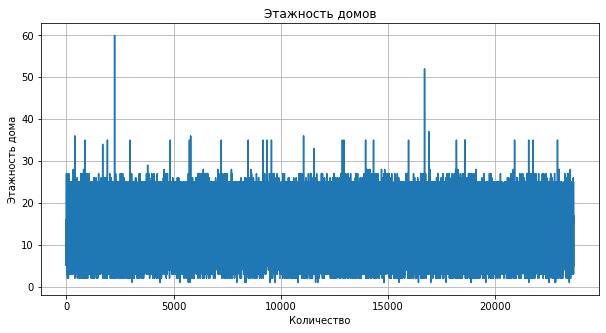

In [190]:
#посмотрим на графике
f, ax = plt.subplots(figsize=(15,6 ))
data['floors_total'].plot(title='Этажность домов', figsize=(10,5), grid=True)
ax.set_ylabel('Этажность дома')
ax.set_xlabel('Количество')
plt.show()

На графике мы видим, что основной массив недвижимости - жилье в "этажных" домах. Два значения необычные: 60 и 50 этажей.

В Петербурге и области самое высокое жилое здание в 37 этажей. Посмотрим количество недвижимости с показателями выше этого значения.
*Источник информации*
https://spbhomes.ru/science/samye-vysokie-zdaniya-v-sankt-peterburge/

In [191]:
#всего 2 объекта, уберем их.
data.query('floors_total > 37')     
data = data.drop(index=[2251])
data = data.drop(index=[16701])

In [192]:
#посчитаем долю пропусков в этажности домов
data['floors_total'].isna().sum(), data ['floors_total'].isna().mean()

(85, 0.003604596921250159)

In [193]:
#удалим пропуски
data = data.dropna(subset=['floors_total'])

Доля пропусков невелика, поэтому удалим их.

In [194]:
#посмотрим насколько типичны данные о самых частых вариантах этажности домов, среди предлагаемых к продаже объектов
data['floors_total'].value_counts().head(10)

5.0     5762
9.0     3753
16.0    1367
12.0    1357
4.0     1192
10.0    1172
25.0    1070
6.0      907
17.0     830
3.0      664
Name: floors_total, dtype: int64

Среди наиболее популярных предложений  - "стандартные" по этажности дома. Данные достоверны.

**Из данных были удалены 2 строки, содержащие недостоверную(ошибочную) информацию и 85 строк с пропусками**

**Этаж**

Пропусков данных в этой категории нет, посмотрим на их достоверность.

In [195]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=int64)

Будем считать данные достоверными: 1.Нет нулевых этажей. 2. Нет этажей выше 37.

#### Высота потолков

Эти данные напрямую не зависят от данных других столбцов (у нас нет данных о серии дома, типе строительства - "сталинка, "хрущовка", "новостройка" и пр.). Данный параметр оценки недвижимости далее будет нужен в анализе.

In [196]:
#Сначала оценим долю пропусков.
data['ceiling_height_m'].isna().mean()

0.3856401089547157

In [197]:
#Посмотрим описание данных
data['ceiling_height_m'].describe()

count    14435.000000
mean         2.767976
std          1.230574
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height_m, dtype: float64

Попробуем оценить количество редких значений.

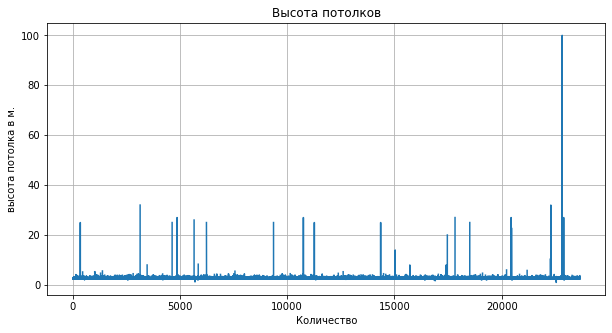

In [198]:
f, ax = plt.subplots(figsize=(15,6 ))
data['ceiling_height_m'].plot(title='Высота потолков', figsize=(10,5), grid=True)
ax.set_ylabel('высота потолка в м.')
ax.set_xlabel('Количество')
plt.show()

На графике мы видим относительно немного значений с высотой потолка от 20 до 100 м. А также несколько значений с высотой потолка до 2 м.

Предположим, что в максимальных данных ошибка -  запятая смещена на один знак вправо от нужного значения (например 32.0 вместо 3,2) Причиной ошибки может быть ошибка ввода, или технических сбой при подготовке данных для исследования. Тогда взглянув на полную информацию о квартирах, мы сможем увидеть "портреты" обычных квартир в многоэтажных домах, предполагающих довольно типовую застройку по стандартам. И не увидим необычные предложения. Проверим гипотезу.

Выведем нужные строки. За отправную точку возьмем высоту потолка 21  метр (то есть с учетом смещения 2,1 м. - это минимально возможная высота потолков по ГОСТу)
*Источник информации* https://pod-potol.com/remont-i-ukhod/oformlenie/kakaya-standartnaya-vysota-potolkov-v-kvartire-normy-i-standarty-dlya-raznykh-vidov-zdaniy.html#1


In [199]:
data.query('ceiling_height_m >= 21')

,index,locality_name,rooms,total_area_m,living_area_m,kitchen_area_m,ceiling_height_m,balcony,floor,floors_total,...,last_price_rub,first_day_exposition,days_exposition,city_centers_nearest_m,airports_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,test
355,355,гатчина,2,55.2,32.0,9.1,25.0,2.0,2,5.0,...,3600000,2018-07-12T00:00:00,259.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3144,3148,волхов,3,75.0,53.0,8.0,32.0,NaN,2,3.0,...,2900000,2018-11-12T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4636,4643,санкт-петербург,2,45.0,30.0,7.0,25.0,1.0,2,9.0,...,4300000,2018-02-01T00:00:00,181.0,13256.0,12016.0,1.0,658.0,1.0,331.0,8.0
4868,4876,мурино,0,25.0,17.0,NaN,27.0,2.0,17,25.0,...,3000000,2017-09-27T00:00:00,28.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5068,5076,санкт-петербург,1,30.5,19.5,5.5,24.0,NaN,1,5.0,...,3850000,2018-10-03T00:00:00,7.0,8389.0,29686.0,3.0,397.0,1.0,578.0,5.5
5238,5246,деревня мины,2,54.0,30.0,9.0,27.0,2.0,3,5.0,...,2500000,2017-10-13T00:00:00,540.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0
5660,5669,санкт-петербург,2,50.0,21.3,7.0,26.0,2.0,3,9.0,...,4400000,2017-08-08T00:00:00,267.0,10912.0,28981.0,1.0,305.0,0.0,NaN,21.7
5797,5807,санкт-петербург,2,80.0,41.0,12.0,27.0,5.0,13,36.0,...,8150000,2019-01-09T00:00:00,38.0,20444.0,18732.0,0.0,NaN,3.0,80.0,27.0
6236,6246,кронштадт,2,44.4,31.3,5.7,25.0,NaN,5,5.0,...,3300000,2019-03-25T00:00:00,NaN,50649.0,68923.0,1.0,417.0,2.0,73.0,7.4
9363,9379,санкт-петербург,3,42.0,30.0,5.2,25.0,NaN,2,5.0,...,3950000,2017-03-26T00:00:00,NaN,13581.0,11647.0,0.0,NaN,0.0,NaN,6.8


Действительно в этой выборке "обычный" жилой фонд: обычная этажность домов, допустимые варианты площади, обычные показатели количества комнат. Будем считать гипотезу подтвердившейся. Заменим значения, перенесем запятую влево на один знак. 

In [200]:
#функция, котороя пройдет по столбцу и преобразует данные
def mult_0_1(row):
    if row >= 21:
        return row*0.1
    else:
        return row

In [201]:
#проверим работу функции
mult_0_1(15), mult_0_1(27)

(15, 2.7)

In [202]:
#применим функцию
data['ceiling_height_m'] = data['ceiling_height_m'].apply(mult_0_1)

In [203]:
data['ceiling_height_m'].max()

20.0

Сейчас максимальное значение в нашей выборке 20 метров. Конечно это аномальное значение, работать с ним и другими нетипичными значениями в этой категории будем на следующем этапе исследования.

Далее посмотрим количество пропусков. 

In [204]:
data['ceiling_height_m'].isna().sum(), data['ceiling_height_m'].isna().mean()

(9061, 0.3856401089547157)

Количество пропусков достаточно велико. Заменим их медианным значением, предварительно скгруппировав данные по населенному пункту и общей этажности дома.

In [205]:
data['ceiling_height_m'] = data['ceiling_height_m'].fillna(data.groupby(['floors_total'])['ceiling_height_m'].transform('median'))
data['ceiling_height_m'].isna().sum()

1

In [206]:
#оставшиеся пропуски заменим медианой
data['ceiling_height_m'] = data['ceiling_height_m'].fillna(data['ceiling_height_m'].median())
data['ceiling_height_m'].isna().sum()

0

Вновь посмотрим на график

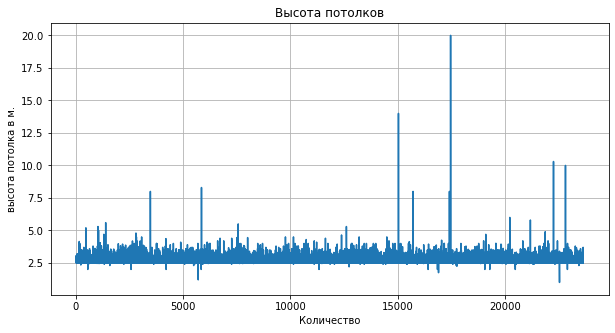

In [207]:
#проверим результат
f, ax = plt.subplots(figsize=(15,6 ))
data['ceiling_height_m'].plot(title='Высота потолков', figsize=(10,5), grid=True)
ax.set_ylabel('высота потолка в м.')
ax.set_xlabel('Количество')
plt.show()

Мы видим, что большинство значений лежат в диапазоне от 2,5 до 4м.

Есть также значения меньше минимально возможной высоты потолков, т.е. менее 2,1 м. Удалим их как неправдоподобные.

In [208]:
#общее количество недостоверных строк и их доля
print(len(data[data['ceiling_height_m'] < 2.1]))
print(len(data[data['ceiling_height_m'] < 2.1]) / len(data))

14
0.000595846101464079


In [209]:
data = data.loc[data['ceiling_height_m'] >= 2.1]

In [210]:
#вновь посмотрим на описание данных
data['ceiling_height_m'].describe()

count    23482.000000
mean         2.710650
std          0.287711
min          2.200000
25%          2.550000
50%          2.650000
75%          2.750000
max         20.000000
Name: ceiling_height_m, dtype: float64

**Опираясь на данные мы отсекли неправдоподобные варианты недвижимости (14 строк, их доля 0,0005).**
Пропуски заменили медианным значением, группируя их по населенному пункту и этажности дома.

#### Балконы

In [211]:
#уникальные згачения
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [212]:
#доля пропусков
data['balcony'].isna().mean()

0.4871816710672004

Количество балконов, в продаваемых объектах от 0 (то есть нет балкона) до 5. 

Очень много пропусков, почти половина всех данных столбца. Посмотрим как распределены эти значения.

In [213]:
data['balcony'].value_counts()

1.0    4171
0.0    3673
2.0    3634
5.0     303
4.0     182
3.0      79
Name: balcony, dtype: int64

Варианты 0-1-2 балкона в распределении берут на себя 95% всех объектов недвижимости, что логично для типовых квартир и типовых "этажных" домов и коттеджей, а также одноэтажной застройки в сельской местности.
Пропуски оставляем. Для дальнейшего анализа количество балконов нам не понадобится.

#### История с географией

Посмотрим количество пропусков в данных, которые генерируются автоматически (не вводятся пользователем).

In [214]:
data[['city_centers_nearest_m', 'airports_nearest_m', 'parks_around_3km', 'parks_nearest_m', 'ponds_around_3km', 'ponds_nearest_m' ]].isna().sum()

city_centers_nearest_m     5470
airports_nearest_m         5493
parks_around_3km           5469
parks_nearest_m           15476
ponds_around_3km           5469
ponds_nearest_m           14469
dtype: int64

Примерно одинаковые значения в данных о расстоянии до центра, до ближайшего аэропорта, водоемах и парках в радиузе 3км. Практически в три раза больше пропусков в данных о парке и водоеме поблизости. Предположим что система не срабатывает на каких то адресах, проверим симметричность пропусков.

In [215]:
#фильтром проверим симметричность пропусков
fittered = data[data['city_centers_nearest_m'].isna() == True]
print(len(fittered))
fittered = fittered[fittered['airports_nearest_m'].isna() == True]
print(len(fittered))
fittered = fittered[fittered['parks_around_3km'].isna() == True]
print(len(fittered))
fittered = fittered[fittered['ponds_around_3km'].isna() == True]
print(len(fittered))

5470
5469
5469
5469


Пропуски симметичны. Все эти данные были внесены в базу данных автоматически. Значит либо система не смогла сработать, либо данные были добавлены в таблицу некорректно.

Продолжим фильтрацию, добавив туда оставшиеся столбцы с большей долей пропусков.

In [216]:
fittered = fittered[fittered['parks_nearest_m'].isna() == True]
print(len(fittered))
fittered = fittered[fittered['ponds_nearest_m'].isna() == True]
print(len(fittered))

5469
5469


Получается, что либо автоматическая система внесения данных не сработала ни на одном столбце более чем в 5000 тысячах случаев, либо эта информация слетела при выгрузке. Кроме того для данных о парках и водоемах поблизости('parks_nearest_m','ponds_nearest_m') опять большой сбой - практически 10000 пропусков (за исключением выделенных симметричных пропусков). Отразим эту ситуацию в итоговом отчете.

Так как для нашего анализа нам нужны только данные о расстоянии до центра 'city_centers_nearest_m', пропуски обработаем только в этом столбце. 

In [217]:
#посмотрим количество и долю пропусков
data['city_centers_nearest_m'].isna().sum(), data['city_centers_nearest_m'].isna().mean()

(5470, 0.23294438293160719)

Заполним пропущенные значения медианным, предварительно сгруппировав их по названию населенного пункта.

In [218]:
# теперь заменяем оставшиеся пропуски с группировкой по населенному пункту
data['city_centers_nearest_m'] = data['city_centers_nearest_m'].fillna(data.groupby(['locality_name'])['city_centers_nearest_m'].transform('median'))
data['city_centers_nearest_m'].isna().sum()

5401

По группировке совсем немного пропусков перезаписалось на медиану. Посмотрим по скольким населенным пунктам можно вообще сделать такой расчет.

In [219]:
print(len(data.pivot_table(index=['locality_name'], values='city_centers_nearest_m', aggfunc=('median'))))
print(len(data['locality_name'].unique()))

25
328


В базе данные по 328 населенным пунктам и только для 25 из них можно найти медианное значение расстояния до центра. Для остальных - нет нужного количества и качества данных. Оставляем эти пропуски не заполняя их.

Для дальнейшего исследования корреляции цены от удаленности от центра будем помнить про эту особенность данных.

In [220]:
#для удобства расчетов переведем расстояние до центра в метрах, к расстоянию в км.
data['center_km'] = data['city_centers_nearest_m'] // 1000

#### Длительность продажи, дата объявления

**'days_exposition', 'first_day_exposition'**

In [221]:
#доля пропусков
data['days_exposition'].isna().mean(), data['first_day_exposition'].isna().mean()

(0.13452857507878374, 0.0)

Доля пропусков в 'days_exposition' достаточно велика посмотрим медиану и среднее. А также оценим достоверность данных.

In [222]:
data['days_exposition'].describe()

count    20323.000000
mean       180.852089
std        219.849999
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимум продажи 1 день - возможный вариант (исходя из личного опыта), максимум 1580 дней - более 4 лет - в теории тоже возможен, если продавец предлагает уникальный объект недвижимости или параметры цена/качество были установлены неверно.

Среднее значительно больше медианы, поэтому пропуски безусловно заполняем медианой.

In [223]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['days_exposition'].isna().sum()

0

### Выводы

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23482 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   23482 non-null  int64  
 1   locality_name           23482 non-null  object 
 2   rooms                   23482 non-null  int64  
 3   total_area_m            23482 non-null  float64
 4   living_area_m           21970 non-null  float64
 5   kitchen_area_m          21818 non-null  float64
 6   ceiling_height_m        23482 non-null  float64
 7   balcony                 12042 non-null  float64
 8   floor                   23482 non-null  int64  
 9   floors_total            23482 non-null  float64
 10  total_images            23482 non-null  int64  
 11  last_price_rub          23482 non-null  int32  
 12  first_day_exposition    23482 non-null  object 
 13  days_exposition         23482 non-null  float64
 14  city_centers_nearest_m  18081 non-null

**Мы оценили данные на правдоподобность и обработали пропуски. Всего было удалено около 1% строк от общей базы, кроме того были исключены столбцы с данными апартаметы/открытая планировка/студия (данные в них представлены в булевом виде и истинных значений недостаточно для анализа)**

## Расчёты и добавление результатов в таблицу

Для удобства категоризируем данные об этаже, разделим их на первый, последний, другой.

In [225]:
#функция принимает строки, обращается к значениям и возвращает категорию этажа
def floors_category(row):
    floor = row ['floor']
    total = row ['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor == total:
        return 'последний'
    else:
        return 'другой'

In [226]:
#применяем и проверяем
data ['floors_group'] = data.apply(floors_category, axis=1)
data[['floor', 'floors_total', 'floors_group']].head(15)

,floor,floors_total,floors_group
0,8,16.0,другой
1,1,11.0,первый
2,4,5.0,другой
3,9,14.0,другой
4,13,14.0,другой
5,5,12.0,другой
6,6,26.0,другой
7,22,24.0,другой
8,26,27.0,другой
9,7,9.0,другой


Выделяем из общего формата даты месяц и год, определяем для каждой даты день недели.

In [227]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data[['first_day_exposition', 'month', 'weekday', 'year']].head() #проверяем

,first_day_exposition,month,weekday,year
0,2019-03-07T00:00:00,3,3,2019
1,2018-12-04T00:00:00,12,1,2018
2,2015-08-20T00:00:00,8,3,2015
3,2015-07-24T00:00:00,7,4,2015
4,2018-06-19T00:00:00,6,1,2018


Найдем цену квадратного метра, а также отношение общей площади к жилой, общей площади к площади кухни

In [228]:
data['price_per_square_m'] = data['last_price_rub'] / data['total_area_m']
data['ratio_total_living'] = data['living_area_m'] / data['total_area_m']
data['ratio_total_kitchen'] = data['kitchen_area_m'] / data['total_area_m']
data[['price_per_square_m', 'ratio_total_living', 'ratio_total_kitchen']].describe() #проверим и оценим

,price_per_square_m,ratio_total_living,ratio_total_kitchen
count,2.348200e+04,21970.000000,21818.000000
mean,9.941258e+04,0.562550,0.187367
std,5.042490e+04,0.106030,0.072656
min,1.118349e+02,0.021583,0.022750
25%,7.658499e+04,0.492543,0.133333
50%,9.500000e+04,0.566667,0.172414
75%,1.141989e+05,0.636702,0.232558
max,1.907500e+06,1.000000,0.724638


Соотношения вполне допустимые, максимумы в 'ratio_total_living', 'ratio_total_kitchen', конечно, нетипичные. Возможно данные продавцом были внесены некорректно, или какие-то объекты в целом выпадают из общей картины, дальнейшая работа с параметрами поможет разобраться с этими цифрами.

Очень маленькая цена в минимуме цены квадратного метра, посмотрим на это удивительное жилье.

In [229]:
data[data['price_per_square_m'] == data['price_per_square_m'].min()]

,index,locality_name,rooms,total_area_m,living_area_m,kitchen_area_m,ceiling_height_m,balcony,floor,floors_total,...,ponds_nearest_m,test,center_km,floors_group,month,year,weekday,price_per_square_m,ratio_total_living,ratio_total_kitchen
8778,8793,санкт-петербург,2,109.0,32.0,40.5,2.75,NaN,25,25.0,...,NaN,36.5,9.0,последний,3,2019,2,111.834862,0.293578,0.37156


Только один объект недвижимости - квартира в Санкт-Петербурге, верхний этаж, 109 кв.м. - в целом ничего необычного, кроме цены - которая, скорее была дана с ошибкой. Далее мы посмотрим распределение значений в этом столбце и уберем все выбросы.

## Исследовательский анализ данных

### Функции для анализа

In [230]:
#для построения гистограммы по столбцу датафрейма
def hist_data(data, column, bins=50):
    return data.plot(y = column, kind='hist', bins=bins, figsize=(10,5), grid=True, title=column)              

In [231]:
#для построения боксплот по столбцу датафрейма
def boxplot_data(data, column, x=10, y=10):
     return data.plot(y=column, kind='box', figsize=(x,y),grid=True, title=column)

In [232]:
#для удаления выбросов по столбцу из датафрейма
def clean_data(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    
    clean_column = (data[column] >= (q1-1.5*iqr)) & (data[column] <= (q3+1.5*iqr ))
    
    return data.loc[clean_column]

### Графики, описание распределения, удаление выбросов

#### Общая площадь / 'total_area_m'

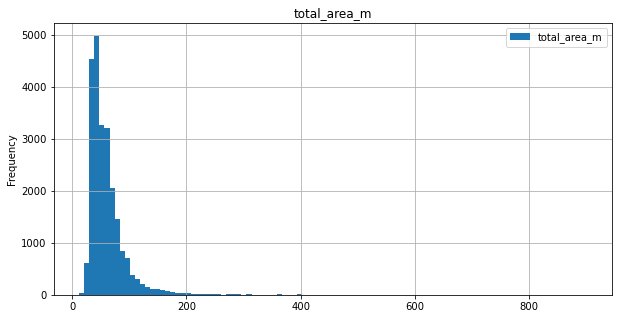

In [279]:
hist_data(data, 'total_area_m', 100)
plt.show()

Распределение нормальное, на гистограмме видно, что большинство значений - квартиры 60-100 метров, есть немного очень больших значений. Оценим выбросы.

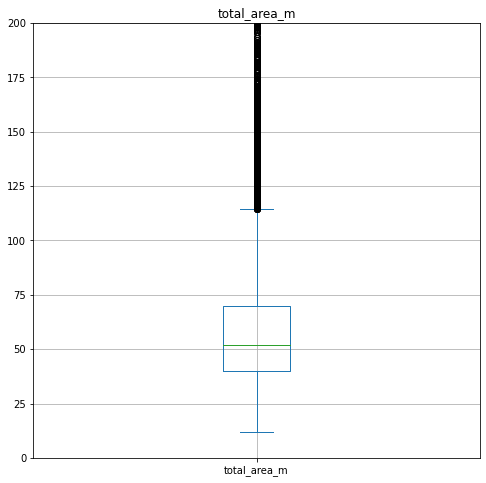

In [280]:
boxplot_data(data,'total_area_m', 8,8).set_ylim(0,200)
plt.show()

Медианное значение чуть более 50м., все что больше 115 кв. м. - выбросы. Удаляем их.

In [235]:
good_data = clean_data(data, 'total_area_m')
#data.head()

#### Цена / 'last_price_rub'

In [236]:
data['last_price_rub'].describe()

count    2.348200e+04
mean     6.545614e+06
std      1.092756e+07
min      1.219000e+04
25%      3.413500e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price_rub, dtype: float64

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Простой способ избавить от е-формата чисел при анализе данного столбца - перевести значения в колонке last_price из руб в млн руб. Для этого значения в колонке last_price нужно разделить на 1 000 000.

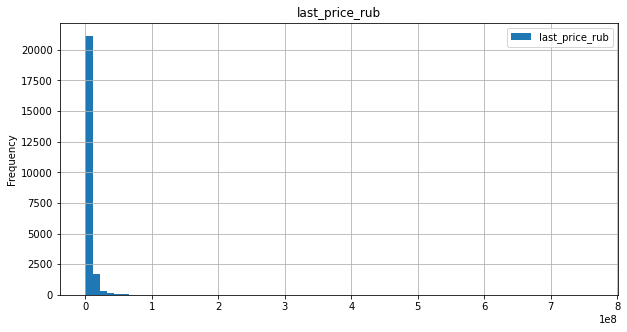

In [281]:
hist_data(data, 'last_price_rub', bins=70)
plt.show()

Гистограмма распределения показывает, что большинство объявлений примерно в одном ценовом диапазоне, достаточно дорогие квартиры, встречаются значительно реже в нашей выборке. Посмотрим выбросы.

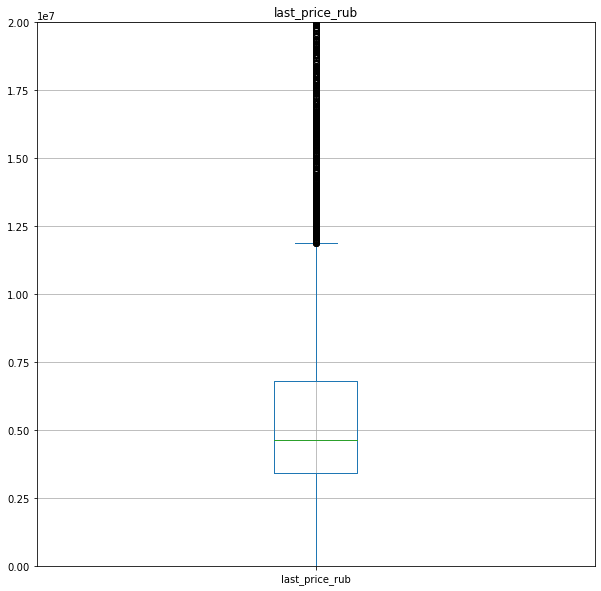

In [282]:
boxplot_data(data, 'last_price_rub').set_ylim(0, 20000000)
plt.show()

Медианное значение - чуть менее 5 миллионов рублей. Мы видим значения, которые лежат за пределами нашего графика, удаляем выбросы.

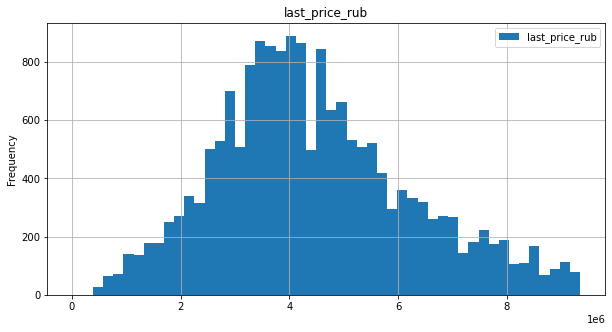

In [283]:
good_data = clean_data(good_data, 'last_price_rub')
hist_data(good_data, 'last_price_rub')
plt.show()

Итоговое распределение - нормальное. Квартир средней рыночной цены - большинство.

#### Количество комнат / 'rooms'

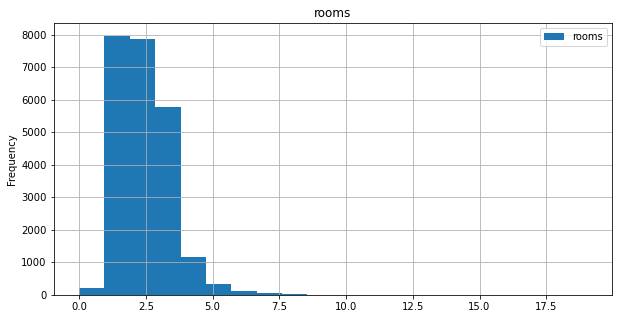

1     7964
2     7870
3     5763
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [284]:
hist_data(data, 'rooms', bins=20)
plt.show()
data['rooms'].value_counts()

Большинство квартир имеют "привычное" количество комнат 1/2/3/4. Среди уникальных значений столбца есть 0 комнат - скорее всего такие данные ввели владельцы студий или квартир со свободной планировкой (порядок количества примерно одинаковый). "Слишком многокомнатные" квартиры в меньшинстве. Оценим выборку на предмет выбросов.

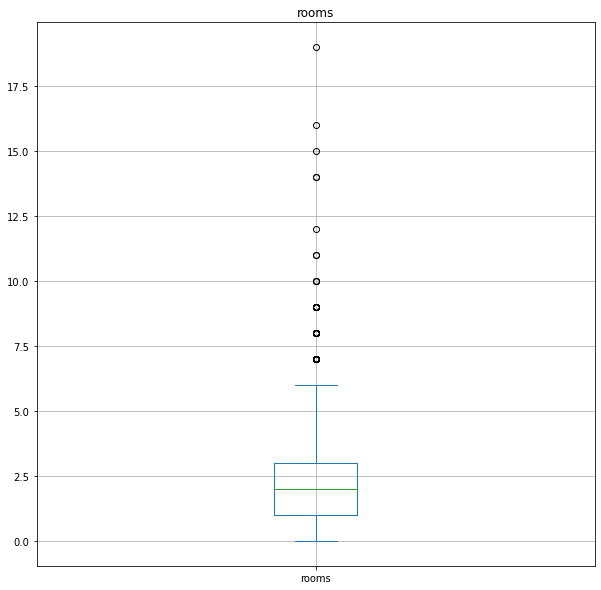

In [285]:
boxplot_data(data, 'rooms')
plt.show()

Выбросы есть, их немного, удаляем.

In [242]:
good_data = clean_data(good_data, 'rooms')
good_data['rooms'].value_counts()

1    7906
2    7400
3    4697
4     655
0     192
5      60
6       4
Name: rooms, dtype: int64

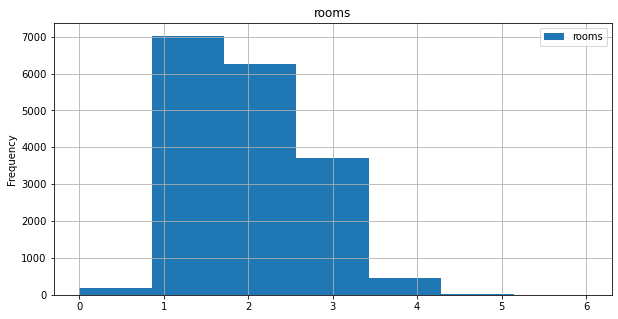

In [286]:
hist_data(good_data, 'rooms', bins=7)
plt.show()

В нашей базе больше всего квартир с количеством комнат 1-3, остальные варианты редки.

#### Высота потолков / 'ceiling_height_m'

In [244]:
data['ceiling_height_m'].describe()

count    23482.000000
mean         2.710650
std          0.287711
min          2.200000
25%          2.550000
50%          2.650000
75%          2.750000
max         20.000000
Name: ceiling_height_m, dtype: float64

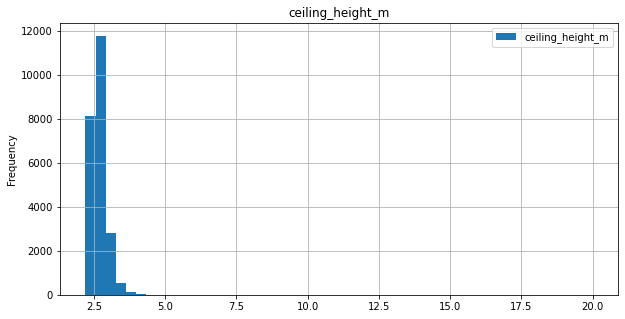

In [287]:
hist_data(data, 'ceiling_height_m')
plt.show()

Распределение нормальное, большое количество объявлений - квартиры высота потолка в которых от 2,5 до 3 метров. Посмотрим выбросы.

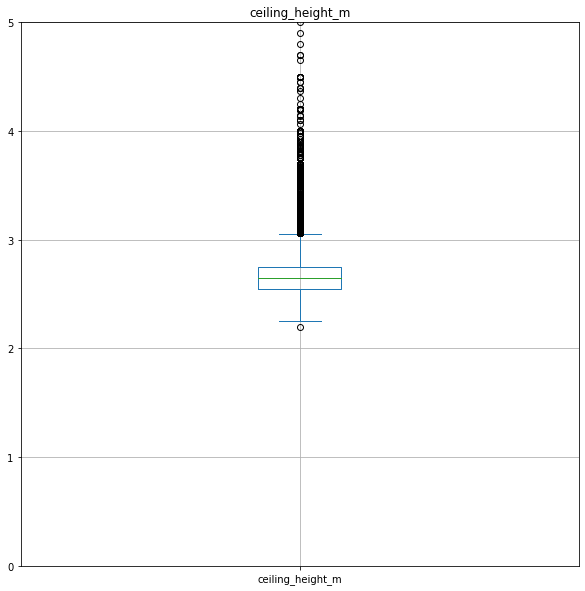

In [288]:
boxplot_data(data, 'ceiling_height_m').set_ylim(0,5)
plt.show()

Выбросы есть как после максимального значения(много), так и после минимального(несколько). Удалим их.

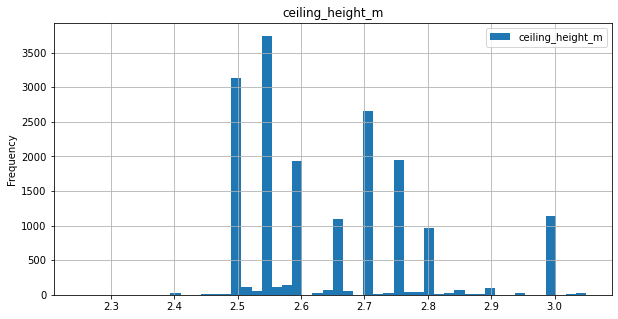

In [289]:
good_data = clean_data(good_data, 'ceiling_height_m')
hist_data(good_data, 'ceiling_height_m')
plt.show()

Сейчас наша выборка ограничивается высотой потолка от 2,4 до 3,5 метров.

#### Время продажи квартиры / 'days_exposition'

In [248]:
data['days_exposition'].describe()

count    23482.000000
mean       169.302530
std        206.614704
min          1.000000
25%         45.000000
50%         95.000000
75%        198.750000
max       1580.000000
Name: days_exposition, dtype: float64

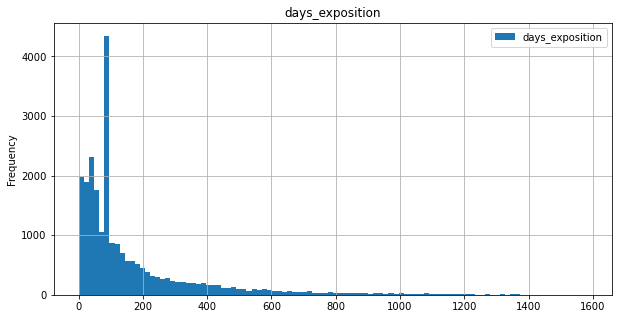

In [290]:
hist_data(data, 'days_exposition', bins=100)
plt.show()

Очень интересное распределение. Посмотрим на него подробнее после удаления выбросов.

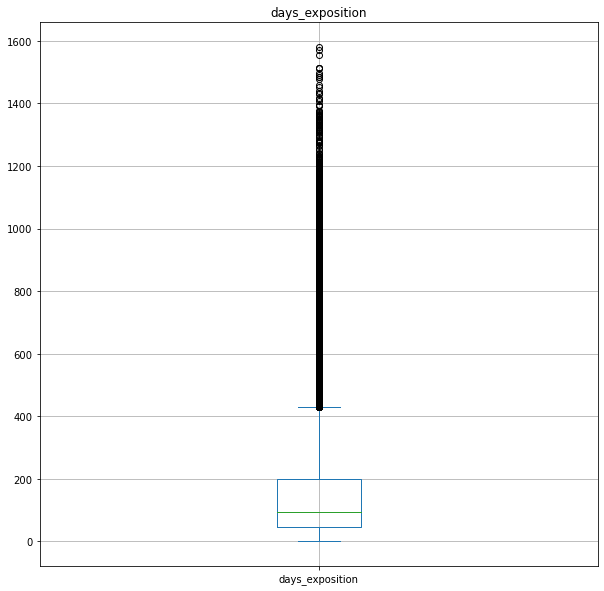

In [291]:
boxplot_data(data, 'days_exposition')
plt.show()

Выбросов больше максимального в боксплоте значения много - удалим их

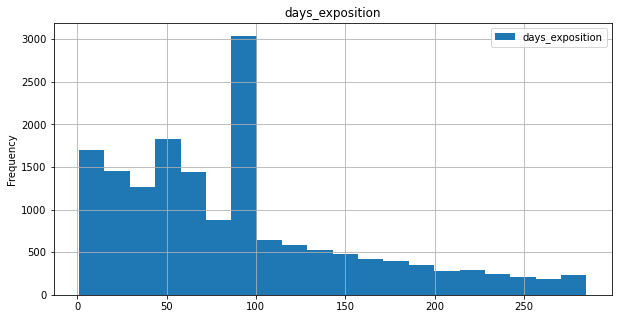

In [292]:
good_data = clean_data(good_data, 'days_exposition')
hist_data(good_data, 'days_exposition', bins=20)
plt.show()

Посмотрим самые частные варианты точнее.

In [252]:
good_data['days_exposition'].value_counts().head(10)

95.0    2427
45.0     861
60.0     510
7.0      212
30.0     189
4.0      154
3.0      149
5.0      137
14.0     131
20.0     130
Name: days_exposition, dtype: int64

Возможно, такое волнообразное движение графика связано со снижением цены на один и тот же объект недвижимости. В нашей базе только цена, по которой квартира была продана, но нет первоначальной и промежуточных(если они были). Предположим, что график показывает периоды продажи, высокие волны - 1)первоначальная цена/быстрая продажа, 2) снижение цены/продажи, 3)снижение цены/продажи и далее зависшее жилье. В итоговом выводе отметим, что данный параметр лучше смотреть во взаимосвязи с графиком снижения первоначальной цены.

In [253]:
good_data['days_exposition'].agg({'mean', 'median'})

mean      106.431462
median     92.000000
Name: days_exposition, dtype: float64

В итоге получилось, что в среднем квартиры продают за 92 дня, примерно 3 месяца. Вполне правдоподобный вариант.

### Сводная было/стало 'mean'\ 'median' по параметрам

In [254]:
#оценим объем первоначального архива и улучшенной по качеству выборки good_data
(len(data)-len(good_data))/len(data), len(good_data)

(0.22766374244101864, 18136)

После второго этапа обработки (удаления выбросов) - объем информации для анализа заметно уменьшился (на 22%). Но так как первоначальный объем архива был велик, то и качественно улучшенной информации для дальнейшего анализа окажется достаточно - 18136 строк. Ниже посмотрим как изменились данные, после их очищения от выбросов.

In [255]:
a = data[['last_price_rub','rooms','total_area_m', 'city_centers_nearest_m', 'days_exposition']].agg({'mean', 'median'})
b = good_data[['last_price_rub','rooms','total_area_m', 'city_centers_nearest_m', 'days_exposition']].agg({'mean', 'median'})
old_new_stat = pd.concat([a,b]).reset_index()
old_new_stat.loc[2,'index'] = old_new_stat.loc[2,'index'].replace('median', 'median_new')
old_new_stat.loc[3,'index'] = old_new_stat.loc[3,'index'].replace('mean', 'mean_new')
old_new_stat

,index,last_price_rub,rooms,total_area_m,city_centers_nearest_m,days_exposition
0,mean,6.545614e+06,2.071927,60.362252,14193.217576,169.302530
1,median,4.650000e+06,2.000000,52.000000,13073.000000,95.000000
2,mean,4.593266e+06,1.872133,51.211731,15514.873503,106.431462
3,median,4.290000e+06,2.000000,47.400000,13972.000000,92.000000


Используя анализ распределения данных и характерный разброс(графики боксплот) мы отсекли выбросы, которые оказывали влияние на расчет среднего и медианы. Нынешние значения более правдоподобны, а значит дадут более достоверные данные для выполнения главной задачи нашего проекта.

### Корреляция: параметры, таблицы, графики

Посмотрим как зависит цена от количества комнат, общей площади и расстояния от центра.

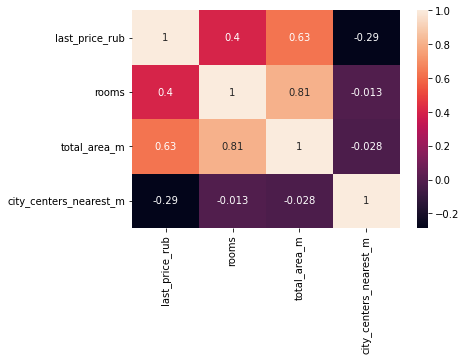

In [293]:
good_data_corr = good_data[['last_price_rub','rooms','total_area_m', 'city_centers_nearest_m']].corr()
sn.heatmap(good_data_corr, annot=True)
plt.show()

**Итак, мы видим:**

**1. Количество комнат слабо влияет на цену квартиры, возможно потому, что большое количество комнат, не всегда бОльшая площадь( корреляция слабая - 0,41)**

**2. А вот общая площадь заметнее оказывает влияние на цену (корреляция средняя - 0,66)**

**3. Параметр расстояние до центра дает ожидаемую отрицательную корреляцию - -0,3. То есть чем дальше от центра, тем дешевле жилье.**
    
    Интересно, что и количество комнат и общая площадь в связке с расстоянием до центра дали пусть совсем незначительную, но все же отрицательную корреляцию.    

Далее посмотрим как цена продаваемой квартиры зависит от этажа.

In [257]:
good_data_floors = good_data.pivot_table(index='floors_group', values='last_price_rub', aggfunc='mean')
good_data_floors

,last_price_rub
floors_group,
другой,4.790436e+06
первый,3.926296e+06
последний,4.135163e+06


**Мы видим, что самая низкая средняя цена у квартир, продающихся на первом этаже. На последнем этаже цена немного выше. И значительно выше средняя цена для всех остальных этажей.**

Далее посмотрим как менялась средняя цена на жилье на протяжении почти 5 лет (данные с ноября 2014 по май 2019).

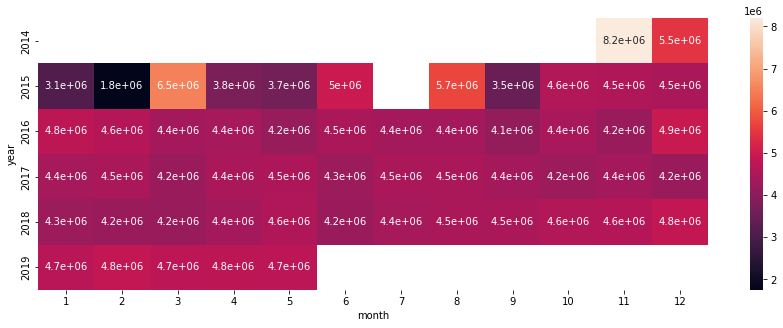

In [294]:
year_month= good_data.pivot_table(index='year', columns='month', values='last_price_rub', aggfunc='mean')
plt.figure(figsize=(15,5))
sn.heatmap(year_month, annot=True)
plt.show()

Наша тепловая карта показывает насколько чувствителен рынок недвижимости к внешним обстоятельствам (политическим и финансовым кризисам). Политическая обстановка в 2014 году, первая волна санкционной политики, попытки государства поддержать сначала рынок новостороек, потом продажи вторичного жилья в ипотеке дали качелеобразное изменение цены в период с ноября 2014 по март 2015 года, к концу 2015 года цены нормализовались и с небольшими колебаниями удерживались весь оставшийся период (в нашей базе до мая 2019г.)

*Внешние источники: https://www.fontanka.ru/2022/03/26/70534217/*

*Возвращаясь к 2015 году, можно отметить, что и тогда рынок спасли субсидированные ставки. «В марте 2015 года была утверждена государственная программа субсидирования ипотеки, действие которой должно было снизить темпы «проседания» объема выдачи жилищных кредитов в течение года, — вспоминает Ольга Трошева. — В первом квартале 2015 года действия игроков на рынке ипотечного кредитования в Петербурге можно разделить на два периода: до внедрения программы государственного субсидирования ипотеки — январь — начало марта и после активации программы — с середины марта».После введения государственной программы субсидирования ипотеки во второй декаде марта 2015 года банки один за другим объявили о снижении ставок до уровня около12%: на конец марта ипотеку в некоторых банках можно было получить по условиям 11,5%.*


Посмотрим зависит ли итоговая цена продажи недвижимости от дня недели, когда появилось объявление. 

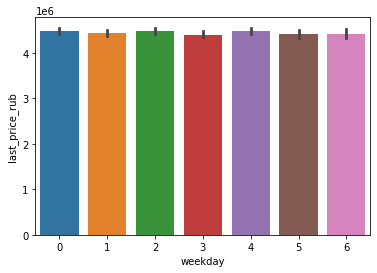

In [295]:
sn.barplot(x=good_data['weekday'], y=good_data['last_price_rub'])
plt.show()

**Мы видим, что резких отклонений почти нет. Возможно потому, что в анализе у нас только последняя цена перед продажей. Если бы анализ строился на первоначальной цене - варианты стоимости квартиры по дням могли быть иными.**

Выделим начеленные пункты с бОльшим количеством объявлений. Посмотрим в каком населенном пункте жилье дороже.

In [260]:
good_data['locality_name'].value_counts().head(10)

санкт-петербург      11274
мурино                 537
кудрово                420
поселок шушары         394
всеволожск             338
колпино                298
поселок парголово      295
пушкин                 289
гатчина                261
выборг                 192
Name: locality_name, dtype: int64

Подавляющее большинство объявлений о продаже квартиры из Петербурга. Поэтому для дальнейшего анализа мы оставим Санкт-Петербург и еще 10 населенных пунктов. Все они - части мегаполиса, либо известный исторический пригород.

In [261]:
locality_stat = good_data.groupby('locality_name')['price_per_square_m'].agg({'count', 'mean'}).sort_values(by='count', ascending=False).head(11)
locality_stat.sort_values(by='mean',ascending=False)

,count,mean
locality_name,,
санкт-петербург,11274,104698.792892
пушкин,289,99891.746609
кудрово,420,95290.495007
поселок парголово,295,89963.938300
мурино,537,86291.664811
петергоф,164,83564.336813
поселок шушары,394,78667.859005
колпино,298,75289.531808
гатчина,261,68725.640702


Ожидаемо, самая высокая цена в Санкт-Петербурге. Среди остальных населенных пунктов лидирует по цене - Пушкин (историческая и современная малоэтажная застройка, готовая инфраструктура, парки и водоемы). Квартиры в Мурино (втором по популярности) не такие дорогие, возможно, потому что в нем только современная высокоэтажная застройка, нет полноценной инфраструктуры, новый район. Самые дешевые квартиры в нашей выборке в Выборге (здесь сказывается скорее всего удаленность от Петербурга).

#### Недвижимость в центре Санкт-Петербурга

In [262]:
spb = good_data.loc[good_data['locality_name'] == 'санкт-петербург']


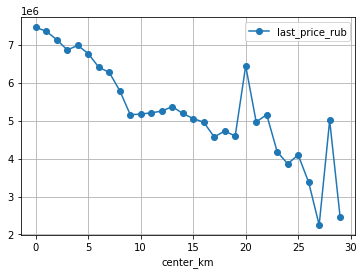

In [296]:
spb.pivot_table(index='center_km', values='last_price_rub', aggfunc='mean').plot(style='o-', grid=True)
plt.show()

Мы видим, что чем дальше от центра тем ниже цена. На 20 км. от центра пик, далее снова снижение и новый пик на 28 км. Возможно эти данные связаны с недвижимостью в отдаленных, но престижных районах (Курортном, или в историческом пригороде),при необходимости эту информацию можно было бы получить и оценить ее достоверность, зная точный адрес дома.

Итак, первый излом графика виден на данных с удалением от центра на примерно 3 км, второе изменение на примерно 7 км. - после этой точки резкое снижение цены с  последующей ее стабилизацией цены на удалении в 9 км.

Оценим количество данных в границах 3 и 7 км от центра.

In [264]:
len(spb.loc[spb['center_km'] <= 3]), len(spb.loc[spb['center_km'] <= 7])

(352, 1422)

Для дальнейшего анализа выберем более объемную выборку, установим как центр Санкт-Петербурга расстояние от условной точки в радиусе до 7 км включительно.

In [265]:
spb_center = spb.loc[spb['center_km'] <= 7]

In [266]:
good_data[['total_area_m', 'last_price_rub']].mean()

total_area_m      5.121173e+01
last_price_rub    4.593266e+06
dtype: float64

In [267]:
spb_center[['total_area_m', 'last_price_rub']].mean()

total_area_m      5.930987e+01
last_price_rub    6.742431e+06
dtype: float64

In [268]:
spb_center[['total_area_m', 'last_price_rub']].mean() / good_data[['total_area_m', 'last_price_rub']].mean()

total_area_m      1.158131
last_price_rub    1.467895
dtype: float64

**Общая площадь, предлагаемых к продаже квартир в центре Санкт-Петербурга, на 15% выше, чем во всей выборке: 51 кв. м. по выборке, 59 кв. м. по Санкт-Петербургу. Средняя цена в центре города (6700000 руб.) заметно выше, чем по общей выборке (4500000 руб.) - на 46%**

In [269]:
#посмотрим как распределены данные по комнатам в квартирах
good_data['rooms'].value_counts(), spb_center['rooms'].value_counts()

(1    7042
 2    6433
 3    3937
 4     508
 0     176
 5      38
 6       2
 Name: rooms, dtype: int64,
 2    552
 1    387
 3    376
 4     89
 0     12
 5      5
 6      1
 Name: rooms, dtype: int64)

**В общей выборке большинство продаваемых квартир однокомнатные, незначительно уступая им по количеству далее идут двухкомнатные. Выборка по центру Петербурга, показывает бОльшее количество предложений квартир двухкомнатных (что перекликается  с данными о  бОльшей средней площади пунктом выше), на втором месте с незначительным отставанием "однушки". Отсальные данные по ранжированию совпадают.**

In [270]:
#сравним показатели высоты потолков
good_data['ceiling_height_m'].value_counts().head(10), spb_center['ceiling_height_m'].value_counts().head(10)

(2.55    3693
 2.50    3153
 2.70    2719
 2.75    1974
 2.60    1959
 3.00    1237
 2.65    1040
 2.80    1040
 2.56     118
 2.90     109
 Name: ceiling_height_m, dtype: int64,
 3.00    405
 2.55    265
 2.80    128
 2.70    120
 2.50    101
 2.75     96
 2.60     85
 2.90     49
 2.65     48
 2.85     17
 Name: ceiling_height_m, dtype: int64)

**В центре Петербурга, в отличие от общей выборки, потолки в продаваемых квартирах выше. Большее количество квартир с потолком 3 метра, что связано с особенностью  исторической застройки центра города. В первую пятерку по Петербургу также вошли потолки высотой 2,8 м. А по общей базе "лидирует" достаточно низкие потолки 2,5 м., потолков высотой 2,8 и 3,0 м. нет в первой пятерке.**

Далее посмотрим как цена в центре Петербурга зависит от количества комнат, общей площади и удаляемости от точки центра.

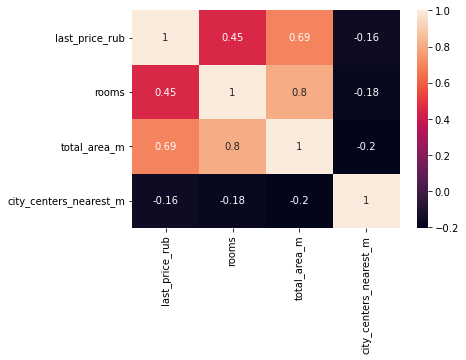

In [297]:
# корреляция
spb_center_corr = spb_center[['last_price_rub','rooms','total_area_m', 'city_centers_nearest_m']].corr()
sn.heatmap(spb_center_corr, annot=True)
plt.show()

По центру Санкт-Петербурга мы видим практически идентичные с общей базой данные по параметрам зависимости цены от количества комнат и общей площади квартиры.
- Количество комнат слабо влияет на цену (корреляция 0,45) \\ по общей базе 0,41
- Влияние общей площади на цену заметнее, корреляция средняя - 0,69 \\ по общей базе 0,66

Разумеетсяб что в ситуации с выборкой по центру Петербурга зависимость цены от удаленности от центра будет меньшей, чем по всей выборке. Очень слабая отрицательная корреляция -0,16 \\ по общей базе -0,3 

In [272]:
#как продаются этажи
spb_center_floors = spb_center.pivot_table(index='floors_group', values='last_price_rub', aggfunc='mean')
spb_center_floors
floors_top = good_data_floors.merge(spb_center_floors, on='floors_group', suffixes=('_spb_center', '_good_data'))
floors_top

,last_price_rub_spb_center,last_price_rub_good_data
floors_group,,
другой,4.790436e+06,6.947246e+06
первый,3.926296e+06,5.848091e+06
последний,4.135163e+06,6.712507e+06


**Также как и в общей базе первый этаж дешевле, другие этажи дороже. Но если в общей базе разница между средней ценой последнего и других этажей составляет примерно 650000 руб, и разница в средней цене между первым и последним этажом небольшая - 200000 руб., то в центре Санкт-Петербурга ситуация иная. Первый этаж в среднем примерно на миллион рублей дешевле последнего, а последний всего на 200000 руб. дешевле других этажей. Таким образом по общей базе в цене "западают" квартиры на первом и последнем этаже, а в центре Петербурга с заметно более низкой ценой только квартиры на первом этаже.**

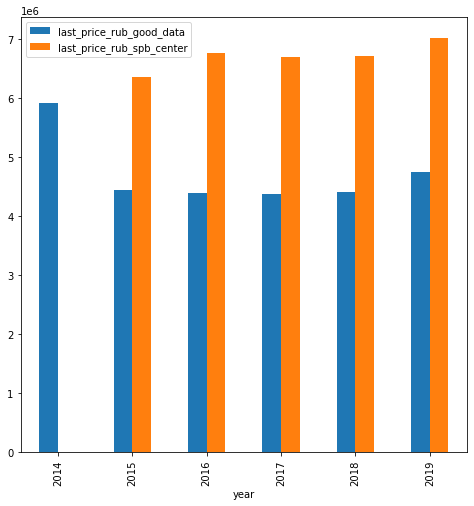

In [298]:
#цена и годы продаж
price_year_good_data = good_data.pivot_table(index='year', values='last_price_rub', aggfunc='mean')
price_year_spb_center = spb_center.pivot_table(index='year', values='last_price_rub', aggfunc='mean')
price_year = price_year_good_data.merge(price_year_spb_center, on='year', suffixes=('_good_data', '_spb_center'), how='left')
price_year.plot(kind='bar', figsize=(8, 8))
plt.show()

**В общей базе заметно резкое падение средней цены после 2014 года, с 6500000 руб. до 4800000 руб. в 2015 г. Далее еще немного снизившись с 2016 г. цены стояли на месте и в 2019 году повысились до показателей 2015 года. Цены в центре Петербурга заметно выше изначально, за все время они не опускались ниже 6400000 руб., кроме того после 2015 года цены с небольшими перепадами, но все же постепенно росли.**

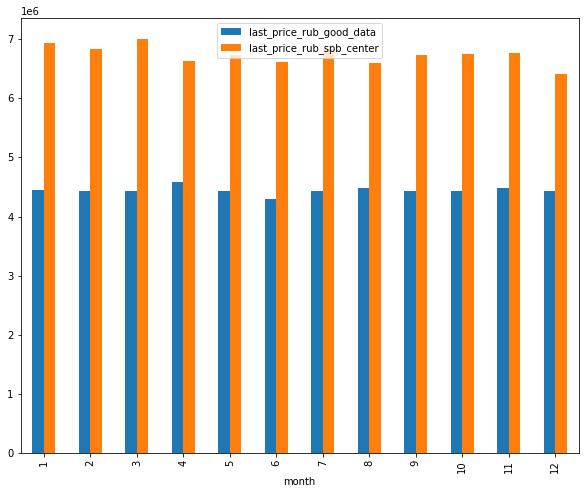

In [299]:
#цена и месяц выставления объявления о продаже
price_month_good_data = good_data.pivot_table(index='month', values='last_price_rub', aggfunc='mean')
price_month_spb_center = spb_center.pivot_table(index='month', values='last_price_rub', aggfunc='mean')
price_month = price_month_good_data.merge(price_month_spb_center, on='month', suffixes=('_good_data', '_spb_center'), how='left')
price_month.plot(kind='bar', figsize=(10, 8))
plt.show()

**По общей базе нет сколько либо существенных перепадов. Можем только сказать, что несколько выше остальных средняя цена квартир, выставленных на продажу в апреле. Ниже всего по средней цене были проданы квартиры, объявленные в базе в июне. Ситуация в центре Петербурга также без значимых перепадов, но все же с более заметными волнами: так самый большой спад средней цены здесь заметен в декабре, самый удачный для выставления объявления - первый квартал года.**

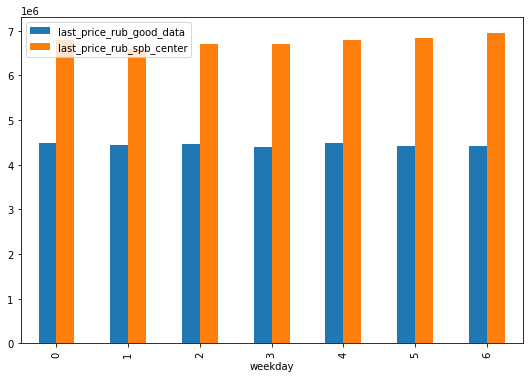

In [300]:
price_weekday_good_data = good_data.pivot_table(index='weekday', values='last_price_rub', aggfunc='mean')
price_weekday_spb_center = spb_center.pivot_table(index='weekday', values='last_price_rub', aggfunc='mean')
price_weekday = price_weekday_good_data.merge(price_weekday_spb_center, on='weekday', suffixes=('_good_data', '_spb_center'), how='left')
price_weekday.plot(kind='bar', figsize=(9, 6))
plt.show()

**По дням недели как в общей базе, так и в данных по центру Петербурга явной зависимости от дня недели выставления объявления о продаже не прослеживается.**

Помня, о необычном распределении данных от количестве дней в продаже, посмотрим сколько дней и как именно продавались квартиры в центре Санкт-Петербурга.

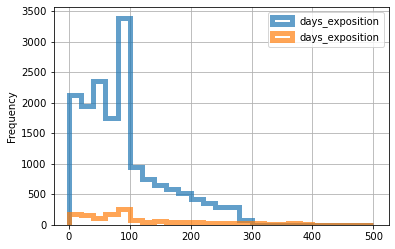

In [301]:
ax=good_data.plot(kind='hist', y='days_exposition', histtype='step', range=(0,500), bins=25, linewidth=5, alpha=0.7)
spb_center.plot(
    kind='hist', y='days_exposition', histtype='step', range=(0,500), bins=25, linewidth=5, alpha=0.7, ax=ax, grid=True, legend=True
)
plt.show()

После 100 дней в продаже количество объектов недвижимости продающихся дольше постепенно снижается - это общее в графиках. В обеих гистограммах также есть волна увеличения продаж в срок 95-100 дней. Отличия: на общей гистограмме три ярких волны (то есть есть три периода,когда квартиры продавались наиболее часто), то в центре Петербурга таких пиковых волн две и они сглажены. На месте второй волны в гистограмме по общей базе - увеличение числа квартир, которые продавались в срок примерно 45-55 дней, а в гистограмме по центру Петербурга наоборот снижение количества продаваемых в этот срок квартир. При необходимости, эти данные можно проанализировать подробнее, при условии дополнения нашего архива всеми данными о цене (сейчас мы имеем только цену продажи и не знаем первоначальной цены и того, как снижалась цена, снижалась ли она вообще). 

In [277]:
spb_center['days_exposition'].agg({'mean', 'median'}), good_data['days_exposition'].agg({'mean', 'median'})

(mean      114.398734
 median     95.000000
 Name: days_exposition, dtype: float64,
 mean      106.431462
 median     92.000000
 Name: days_exposition, dtype: float64)

Квартиры в центре Петербурга продаются чуть дольше.

### Выводы

По показателям зависимости цены квартиры от количества комнат и расстояния до центра, данные по общей базе и по центру Санкт-Петербурга совпадают. Количество комнат слабо влияет на цену, общая площадь заметно влияет на цену. Расстояние от центра заметно уменьшает цену в общей базе, и незначительно уменьшает в выборке по Санкт-Петербургу. Квартиры в центре продаются чуть дольше.

Отличается типовой портрет квартиры, в общей базе это однокомнатная квартира с потолками 2,55 м, средней площадью 61 кв.м и средней ценой 4,5 млн. руб. В базе по центру Санкт-Петербурга это заметно более дорогая квартира - средняя цена 670000 руб., в ней две комнаты, высота потолков 3 метра и средней площадью 59 кв. м. 

## Общий вывод

*Общий объем поступившего для анализа архива составил 22 столбца, 23699 строк в тех столбцах, что без пропусков. После предобработки (оценки данных на правдоподобность и обработки пропусков). Было удалено около 1% строк от общей базы, кроме того были исключены столбцы с данными апартаметы/открытая планировка/студия, так как данные в них представлены в булевом виде и истинных значений в них недостаточно для анализа (Количество студий в архиве всего 149, открытой планировки - 67 и апартаментов 50). После второго этапа обработки (удаления выбросов) - объем информации для анализа заметно уменьшился (на 22%). Но так как первоначальный объем архива был велик, то и качественно улучшенной информации для дальнейшего анализа оказалось достаточно - 18136 строк.*

**1. Проанализировав предложения о продааже квартир, были выделены следующие параметры, влияющие на среднюю цену:**
- общая площадь (заметное влияние, корреляция 0,66)
- количество комнат (небольшое влияние, корреляция 0,41)
- расстояние от центра ожидаемая отрицательная корреляция -0,3, чем дальше от центра тем заметно ниже цена.

**Мы выяснили, что чаще продаются одно, двух и трехкомнатные квартиры, квартиры с потолками 2,5-2,7 м., квартиры средней общей площадью 61 кв. м. Средняя цена квартиры по всей базе 4,5 млн. руб., дешевле всего продаются квартиры на первом и последнем этаже. Среднее время продажи - 106 дней.**

**2. Так как большая часть объявлений в базе принадлежала квартирам в Санкт-Петербурге, мы выделили центр города и провели исследование тех же параметров, что и в общей базе.**
- Квартиры, продающиеся в центре города, в среднем больше площадью, они заметно выше в цене. Дешевле всего продают квартиры на первом этаже, квартиры на последнем и других этажах в цене незначительно отличаются, в среднем квартиры продаются за 114 дней.
- Зависимость цены от количества комнат небольшая, гораздо заметнее зависимость от общей площади.

**3. Кроме Санкт-Петербурга больше всего объявлений о продаже недвижимости в следующих населенных пунктах: Мурино, Кудрово, Шушары, Всеволожск, Колпино, Парголово, Пушкин, Гатчина, Выборг. Лидирует по средней стоимости квартиры  - Пушкин (историческая и современная малоэтажная застройка, готовая инфраструктура, парки и водоемы). Квартиры в Мурино (втором по популярности) не такие дорогие, возможно, потому что в нем только современная высокоэтажная застройка, нет полноценной инфраструктуры, новый район. Самые дешевые квартиры в Выборге (здесь сказывается скорее всего удаленность от Петербурга).

**3. Оценив динамику цен во времени (2014-2019 гг.) видно, что в целом рынок недвижимости очень чувтствителен к политической и экономической ситуации в стране. Но есть постоянство в высокой стоимости недвижимости в центре Санкт-Петербурга. Здесь за все время средняя цена немного колеблясь все же росла, тогда как по всей выборке сначало было замечено снижение цены (2015), а затем небольшая стагнашия до 2019 года, когда цены стали понемногу расти. Для всей базы динамика цен по месяцу выставления объявления не имеет выраженных пиков и спадов. По центру Петербурга можно сказать, что лучше всего выставлять на продажу квартиру в первом квартале года, и хуже - в декабре (средний ценник ниже всего).**


Рекомендации:
1. Проверить выгрузку географической информации, а также то, как именно заносится такая информация в базу. На примере нашего архива мы увидели большое количество пропусков. Эти данные генерируются системой автоматически и получается, что либо система не срабатыват в большом количестве случаев, либо эта информация слетает при выгрузке. 

2. Мы получили интересное распределение в данных с информацией о том, сколько дней в базе пробыло объявление о продаже. У нас есть три выраженных периода: большое количество снятий объявления (т.е. продаж квартиры) через 1-1,5 месяца, через 60 дней и через 90-95 дней. Было бы полезно изучить это распределение во взаимосвязи с динамикой цены во время продажи (в какой период продавец снижал цену, снижал ли, насколько снижал). Мы располагали только финальной ценой продажи.